### 超参数

In [3]:
import numpy as np
from sklearn import datasets

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)


In [10]:
X_train.shape

(1437, 64)

In [11]:
y_train.shape

(360, 64)

In [15]:
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9861111111111112

### 寻找最好的k

In [17]:
best_score = 0.0
best_k = -1
for  k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

print('best_k = ', best_k)
print('best_score = ', best_score)

best_k =  1
best_score =  0.9888888888888889


### best method

In [18]:
best_method = ''
best_score = 0.0
best_k = -1
for method in ["uniform", "distance"]:
    for  k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method

print('best_k = ', best_k)
print('best_score = ', best_score)
print('best_method = ', best_method)

best_k =  1
best_score =  0.9888888888888889
best_method =  uniform


### 搜索明科夫斯基距离相应的p


In [19]:
best_p = -1
best_method = ''
best_score = 0.0
best_k = -1
for method in ["uniform", "distance"]:
    for  k in range(1, 11):
        for p in range(1, 6): 
            knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method, p=p)
            knn_clf.fit(X_train, y_train)
            score = knn_clf.score(X_test, y_test)
            if score > best_score:
                best_k = k
                best_score = score
                best_method = method

print('best_k = ', best_k)
print('best_score = ', best_score)
print('best_method = ', best_method)

best_k =  4
best_score =  0.9916666666666667
best_method =  distance


In [20]:
best_p = -1
best_method = ''
best_score = 0.0
best_k = -1
for method in ["uniform", "distance"]:
    for  k in range(1, 11):
        for p in range(1, 6): 
            knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method, p=p)
            knn_clf.fit(X_train, y_train)
            score = knn_clf.score(X_test, y_test)
            if score > best_score:
                best_k = k
                best_score = score
                best_method = method
                best_p = p

print('best_k = ', best_k)
print('best_score = ', best_score)
print('best_method = ', best_method)
print('best_p', best_p)

best_k =  4
best_score =  0.9916666666666667
best_method =  distance
best_p 3


### Grid Search

In [21]:
params_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

In [42]:
knn_clf = KNeighborsClassifier()

In [23]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid_search = GridSearchCV(knn_clf, params_grid)

In [28]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 3min 31s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
X_train.shape

In [29]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
grid_search.best_score_

0.9867780097425192

In [31]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [32]:
knn_clf = grid_search.best_estimator_

In [33]:
y_predict = knn_clf.predict(X_test)

In [34]:
knn_clf.score(y_predict, y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[3 8 0 4 4 9 0 9 8 9 5 0 4 0 3 8 4 8 3 1 7 7 3 1 5 5 0 7 3 3 4 2 3 3 0 1 1
 7 5 4 6 8 9 3 4 8 1 0 8 6 7 2 9 3 4 6 2 6 7 9 6 8 2 9 8 3 6 8 4 6 9 3 3 8
 8 8 5 9 2 3 1 1 6 1 6 6 5 0 6 6 4 8 6 3 2 0 1 4 6 7 7 6 3 8 5 8 3 1 7 9 1
 6 5 6 6 4 3 9 3 0 6 5 0 6 0 1 2 5 2 8 3 6 9 4 9 6 2 9 5 6 8 3 6 6 1 9 0 7
 1 4 9 5 2 4 8 6 2 8 8 4 6 0 2 4 1 3 1 1 2 6 1 6 4 7 2 3 1 7 9 5 5 8 4 7 1
 7 3 2 4 5 5 5 3 1 1 5 3 1 3 4 0 8 2 3 9 0 6 5 3 6 1 8 8 5 6 6 7 0 8 7 7 5
 5 9 9 5 9 4 4 4 7 6 1 9 0 3 8 2 0 1 7 2 0 8 2 7 9 2 0 8 2 0 5 4 7 6 1 6 2
 7 6 2 7 6 2 3 4 5 8 4 7 7 2 5 5 0 2 8 6 2 2 7 1 2 4 4 6 6 1 9 0 8 1 2 0 4
 8 1 0 2 7 0 8 3 1 5 0 2 6 6 9 4 5 4 5 7 1 4 8 7 2 7 7 2 5 3 1 2 7 4 9 3 5
 5 3 9 9 4 9 9 9 7 5 0 1 5 9 0 2 0 4 0 3 2 8 6 1 6 3 8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [35]:
knn_clf.score(y_test, y_predict)

ValueError: Expected 2D array, got 1D array instead:
array=[3 8 0 4 4 9 0 9 8 9 9 0 4 0 3 8 4 8 3 1 7 7 3 1 5 5 0 7 3 3 4 2 3 3 0 1 1
 7 5 4 6 8 9 3 4 8 8 0 8 6 7 2 9 3 4 6 2 6 7 9 6 8 2 9 8 3 6 8 4 6 9 3 3 8
 8 8 5 9 2 3 1 1 6 1 6 6 5 0 6 6 4 8 6 3 2 0 1 4 6 7 7 6 3 8 5 8 3 1 7 9 1
 6 5 6 6 4 3 9 3 0 6 5 0 6 0 1 2 5 2 8 3 6 9 4 9 6 2 9 5 6 8 3 6 6 1 9 0 7
 1 4 9 5 2 4 8 6 2 8 8 4 6 0 2 4 1 3 1 1 2 6 1 6 4 7 2 3 1 7 9 5 5 8 4 7 1
 7 3 2 4 5 5 5 3 1 1 5 3 1 3 4 0 8 2 3 9 0 6 5 3 5 1 8 8 5 6 6 7 0 8 7 7 5
 5 9 9 5 9 4 4 4 7 6 1 9 0 3 8 2 0 8 7 2 0 8 2 7 9 2 0 8 2 0 5 4 7 6 1 6 2
 7 6 2 7 6 2 3 4 5 8 4 7 7 2 5 5 0 2 8 6 2 2 7 1 2 4 4 6 6 1 9 0 8 1 2 0 4
 8 1 0 2 7 0 8 3 1 5 0 2 6 6 9 4 5 4 5 7 1 4 8 7 2 7 7 2 5 3 1 2 7 4 9 3 5
 5 3 9 9 4 9 9 9 7 5 0 1 5 9 0 2 0 4 0 3 2 8 6 1 6 3 8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [36]:
y_test.shape
y_predict.shape

(360,)

In [37]:
y_test.shape

(360,)

In [38]:
y_predict.shape

(360,)

In [39]:
knn_clf.score(np.array(y_test), np.array(y_predict))

ValueError: Expected 2D array, got 1D array instead:
array=[3 8 0 4 4 9 0 9 8 9 9 0 4 0 3 8 4 8 3 1 7 7 3 1 5 5 0 7 3 3 4 2 3 3 0 1 1
 7 5 4 6 8 9 3 4 8 8 0 8 6 7 2 9 3 4 6 2 6 7 9 6 8 2 9 8 3 6 8 4 6 9 3 3 8
 8 8 5 9 2 3 1 1 6 1 6 6 5 0 6 6 4 8 6 3 2 0 1 4 6 7 7 6 3 8 5 8 3 1 7 9 1
 6 5 6 6 4 3 9 3 0 6 5 0 6 0 1 2 5 2 8 3 6 9 4 9 6 2 9 5 6 8 3 6 6 1 9 0 7
 1 4 9 5 2 4 8 6 2 8 8 4 6 0 2 4 1 3 1 1 2 6 1 6 4 7 2 3 1 7 9 5 5 8 4 7 1
 7 3 2 4 5 5 5 3 1 1 5 3 1 3 4 0 8 2 3 9 0 6 5 3 5 1 8 8 5 6 6 7 0 8 7 7 5
 5 9 9 5 9 4 4 4 7 6 1 9 0 3 8 2 0 8 7 2 0 8 2 7 9 2 0 8 2 0 5 4 7 6 1 6 2
 7 6 2 7 6 2 3 4 5 8 4 7 7 2 5 5 0 2 8 6 2 2 7 1 2 4 4 6 6 1 9 0 8 1 2 0 4
 8 1 0 2 7 0 8 3 1 5 0 2 6 6 9 4 5 4 5 7 1 4 8 7 2 7 7 2 5 3 1 2 7 4 9 3 5
 5 3 9 9 4 9 9 9 7 5 0 1 5 9 0 2 0 4 0 3 2 8 6 1 6 3 8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [47]:
%%time
grid_search = GridSearchCV(knn_clf, params_grid, n_jobs=-1, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   42.8s


Wall time: 51.2 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   50.2s finished


In [46]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [48]:
knn_clf = grid_search.best_estimator_
y_predict = knn_clf.predict(X_train)

In [52]:
knn_clf.score(X_test, y_test)

0.9888888888888889

### 最值归一化

In [53]:
x = np.random.randint(0, 100, size=100)

In [54]:
x

array([44, 48, 80, 64, 29, 92, 66, 74, 49, 42, 10, 84, 23,  0, 42, 93, 11,
       39, 29, 79, 26, 63, 89,  6, 20,  2, 77, 49, 48, 89, 46, 63, 28, 16,
       82, 16, 27,  8, 21, 27,  2, 43, 44, 23, 96,  7, 94, 67, 20, 52, 40,
       62, 44, 53, 93, 82, 46, 29, 49,  6, 80, 21, 40, 40, 84, 71, 74, 61,
        9, 39, 73, 94, 92, 55, 23, 87, 82, 80,  3, 30, 19, 86, 18, 59, 93,
       71, 68, 96, 21, 68, 23, 86,  0, 98, 34, 37, 93, 38, 84, 15])

In [55]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.44897959, 0.48979592, 0.81632653, 0.65306122, 0.29591837,
       0.93877551, 0.67346939, 0.75510204, 0.5       , 0.42857143,
       0.10204082, 0.85714286, 0.23469388, 0.        , 0.42857143,
       0.94897959, 0.1122449 , 0.39795918, 0.29591837, 0.80612245,
       0.26530612, 0.64285714, 0.90816327, 0.06122449, 0.20408163,
       0.02040816, 0.78571429, 0.5       , 0.48979592, 0.90816327,
       0.46938776, 0.64285714, 0.28571429, 0.16326531, 0.83673469,
       0.16326531, 0.2755102 , 0.08163265, 0.21428571, 0.2755102 ,
       0.02040816, 0.43877551, 0.44897959, 0.23469388, 0.97959184,
       0.07142857, 0.95918367, 0.68367347, 0.20408163, 0.53061224,
       0.40816327, 0.63265306, 0.44897959, 0.54081633, 0.94897959,
       0.83673469, 0.46938776, 0.29591837, 0.5       , 0.06122449,
       0.81632653, 0.21428571, 0.40816327, 0.40816327, 0.85714286,
       0.7244898 , 0.75510204, 0.62244898, 0.09183673, 0.39795918,
       0.74489796, 0.95918367, 0.93877551, 0.56122449, 0.23469

In [62]:
X = np.random.randint(0, 100, (50,2))

In [63]:
X = np.array(X, dtype=float)

In [64]:
X[:, 0] = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))

In [65]:
X[:, 1] = (X[:, 1] - np.min(X[:, 1])) / (np.max(X[:, 1]) - np.min(X[:, 1]))

In [66]:
X

array([[0.48979592, 0.81914894],
       [0.79591837, 0.31914894],
       [0.79591837, 0.69148936],
       [0.24489796, 0.78723404],
       [0.62244898, 0.31914894],
       [0.20408163, 0.71276596],
       [0.08163265, 0.22340426],
       [0.68367347, 0.0212766 ],
       [0.05102041, 0.54255319],
       [0.66326531, 0.        ],
       [0.45918367, 0.77659574],
       [0.86734694, 0.70212766],
       [0.85714286, 0.13829787],
       [0.28571429, 0.78723404],
       [0.90816327, 1.        ],
       [0.59183673, 0.29787234],
       [0.55102041, 0.82978723],
       [0.26530612, 0.34042553],
       [0.        , 0.59574468],
       [0.42857143, 0.35106383],
       [0.86734694, 0.90425532],
       [0.06122449, 0.09574468],
       [0.02040816, 0.28723404],
       [0.08163265, 0.15957447],
       [0.13265306, 0.73404255],
       [0.57142857, 0.67021277],
       [0.74489796, 0.43617021],
       [0.33673469, 0.5212766 ],
       [0.65306122, 0.34042553],
       [0.45918367, 0.13829787],
       [0.

In [67]:
np.mean(X[;, 0])

SyntaxError: invalid syntax (<ipython-input-67-2e5eb3528793>, line 1)

In [69]:
np.mean(X[:, 0])

0.4961224489795918

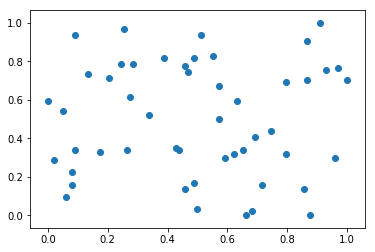

In [72]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [73]:
np.mean(X[:, 0])

0.4961224489795918

In [74]:
np.std(X[:, 0])

0.29129312864736073

In [75]:
np.mean(X[:, 1])

0.4991489361702128

In [76]:
np.std(X[:, 1])

0.2896028407004731

### 均值方差归一化 Standardization

In [77]:
X2 = np.random.randint(0, 100, (50, 2))

In [78]:
X2 = np.array(X2, dtype=float)

In [79]:
X2[:, 0] = (X2[:, 0] - np.mean(X2[:, 0])) / np.std(X2[:, 0])
X2[:, 1] = (X2[:, 1] - np.mean(X2[:, 1])) / np.std(X2[:, 1])

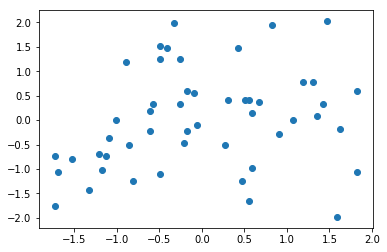

In [80]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()